# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [3]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 52.5440 - 529ms/epoch - 17ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1268 - 60ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4992 - 55ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3883 - 54ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3722 - 55ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.4231 - 55ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3768 - 60ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3916 - 57ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3595 - 60ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3810 - 55ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3821 - 52ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3798 - 56ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.4028 - 55ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3815 - 47ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4021 - 61ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3818 - 55ms/epoch - 2ms/ste

## Extract the weights and bias

In [6]:
model.layers[0].get_weights()

[array([[ 2.014523 ],
        [-3.0255105]], dtype=float32),
 array([5.022967], dtype=float32)]

In [7]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.014523 ],
       [-3.0255105]], dtype=float32)

In [8]:
bias = model.layers[0].get_weights()[1]
bias

array([5.022967], dtype=float32)

## Extract the outputs (make predictions)

In [9]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-15. ],
       [-24.4],
       [ -4.4],
       [ 11.9],
       [-12.6],
       [ 42.3],
       [-16.6],
       [ 13.5],
       [  4.7],
       [  5.8],
       [-38. ],
       [ 38.8],
       [  1.3],
       [-21.2],
       [ 39.9],
       [ -0.6],
       [ 16.9],
       [ 29.5],
       [ 39.7],
       [-32.3],
       [ -4.9],
       [  5.2],
       [-15. ],
       [-10. ],
       [ 33.1],
       [ 14.4],
       [  2.8],
       [ -7.3],
       [ 23.7],
       [  1.5],
       [ 12.8],
       [ 33.6],
       [  4.4],
       [-24.5],
       [ 17.7],
       [-37.5],
       [-10.2],
       [ 32.9],
       [ -3.4],
       [-17.9],
       [ 17.4],
       [  7.1],
       [ 26.6],
       [ 28.9],
       [ -6. ],
       [-28.2],
       [-11. ],
       [ -0.4],
       [ -3.4],
       [-16. ],
       [  2.1],
       [ 26. ],
       [  1. ],
       [ 17.2],
       [ 15.8],
       [  8.3],
       [ 28.1],
       [ 46.8],
       [ 15.8],
       [ 17.8],
       [ 42.4],
       [-13.7],
       [

In [10]:
training_data['targets'].round(1)

array([[-14.6],
       [-23.9],
       [ -4.8],
       [ 11.1],
       [-12.7],
       [ 42.9],
       [-16.3],
       [ 13.2],
       [  5. ],
       [  6. ],
       [-38.4],
       [ 37.6],
       [  2.1],
       [-21.8],
       [ 38.6],
       [ -1.3],
       [ 16. ],
       [ 29.4],
       [ 39.4],
       [-32.7],
       [ -5.5],
       [  4.6],
       [-14.8],
       [ -9.8],
       [ 33.1],
       [ 15.2],
       [  3.3],
       [ -7.1],
       [ 23.7],
       [  1.5],
       [ 13.2],
       [ 34.2],
       [  5.1],
       [-23.6],
       [ 17.3],
       [-37.7],
       [-10.9],
       [ 32.3],
       [ -3.7],
       [-17.7],
       [ 17.5],
       [  7.1],
       [ 26.6],
       [ 28.8],
       [ -5.7],
       [-27.2],
       [-11.1],
       [ -0.3],
       [ -3.3],
       [-16.2],
       [  1.9],
       [ 25.1],
       [  1.9],
       [ 17. ],
       [ 15.4],
       [  8.8],
       [ 27.3],
       [ 46.5],
       [ 15.8],
       [ 17.9],
       [ 42.2],
       [-13.2],
       [

## Plotting the data

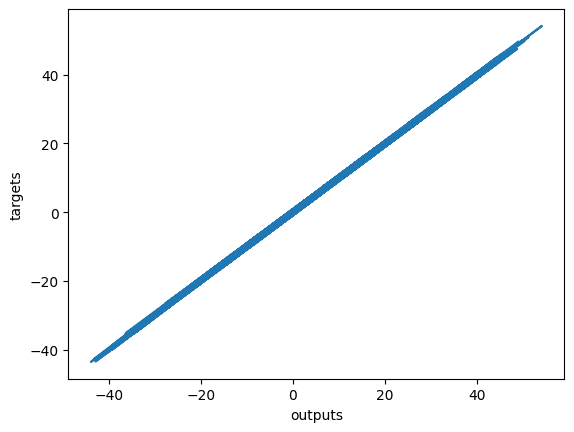

In [11]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()